In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

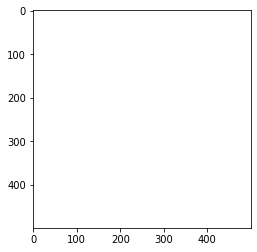

In [2]:
img = np.full((500, 500, 3), 255,dtype=np.uint8)
plt.imshow(img)
plt.show()

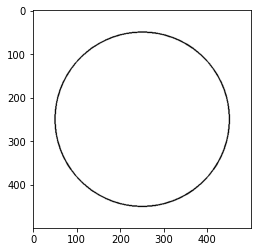

In [3]:
cv2.circle(img, (250, 250), 200, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

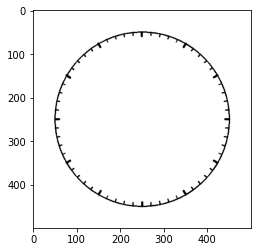

In [4]:
import math
coordinate = []
for i in range(12):
    x = int(250 + 200 * math.cos(i * 30 * math.pi / 180))
    y = int(250 + 200 * math.sin(i * 30 * math.pi / 180))
    x1 = int(250 + 190 * math.cos(i * 30 * math.pi / 180))
    y1 = int(250 + 190 * math.sin(i * 30 * math.pi / 180))
    coordinate.append(np.array([[x, y],[x1, y1]]).reshape((-1, 1, 2)))
cv2.polylines(img, coordinate, True, (0, 0, 0), 4)
coordinate1 = []
for i in range(60):
    x = int(250 + 200 * math.cos(i * 6 * math.pi / 180))
    y = int(250 + 200 * math.sin(i * 6 * math.pi / 180))
    x1 = int(250 + 193 * math.cos(i * 6 * math.pi / 180))
    y1 = int(250 + 193 * math.sin(i * 6 * math.pi / 180))
    coordinate1.append(np.array([[x, y],[x1, y1]]).reshape((-1, 1, 2)))
cv2.polylines(img, coordinate1, True, (0, 0, 0), 2)
plt.imshow(img)
plt.show()

In [5]:
hours = []
minutes = []
seconds = []
for i in range(60):
    x = int(250 + 200 * math.cos(i * 6 * math.pi / 180))
    y = int(250 + 200 * math.sin(i * 6 * math.pi / 180))
    x1 = int(250 + 180 * math.cos(i * 6 * math.pi / 180))
    y1 = int(250 + 180 * math.sin(i * 6 * math.pi / 180))
    x2 = int(250 + 160 * math.cos(i * 6 * math.pi / 180))
    y2 = int(250 + 160 * math.sin(i * 6 * math.pi / 180))
    seconds.append([x, y])
    minutes.append([x1, y1])
    hours.append([x2, y2])

In [6]:
import datetime
def get_time():
    now_time = datetime.datetime.now()
    time_str = now_time.strftime("%d/%m/%Y")
    hour, minute, second = now_time.hour, now_time.minute, now_time.second
    return hour % 12, minute % 60, second % 60, time_str

In [7]:
def time2coordinate():
    hour, minute, second, time_str = get_time()
    return (hour * 5 + minute // 12  + 45) % 60,(minute + 45) % 60 , (second + 45) % 60, time_str

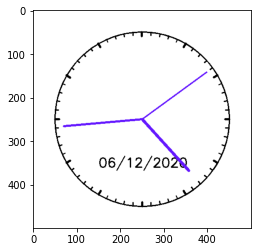

In [8]:
import copy
hour, minute, second, time_str = time2coordinate()
img1 = copy.deepcopy(img)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img1, time_str, (150, 360), font, 1, (0, 0, 0), 2)
cv2.line(img1, (250, 250), (hours[hour][0], hours[hour][1]), (255, 23, 100), 5)
cv2.line(img1, (250, 250), (seconds[second][0], hours[second][1]), (255, 22, 100), 2)
cv2.line(img1, (250, 250), (minutes[minute][0], hours[minute][1]), (255, 23, 100), 3)
plt.imshow(img1[:,:,::-1])
plt.show()

In [9]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    img1 = np.copy(img)
    hour, minute, second, time_str = time2coordinate()
    cv2.putText(img1, time_str, (150, 360), font, 1, (0, 0, 0), 2)
    cv2.line(img1, (250, 250), (hours[hour][0], hours[hour][1]), (255, 23, 100), 5)
    cv2.line(img1, (250, 250), (seconds[second][0], hours[second][1]), (255, 22, 100), 2)
    cv2.line(img1, (250, 250), (minutes[minute][0], hours[minute][1]), (255, 23, 100), 3)
    cv2.imshow('clocking', img1)
    if cv2.waitKey(1) == 27:
        break